## WEEK 5

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("C:\\Users\\porum\\Downloads\\final_dataset.csv")
df.head(5)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban


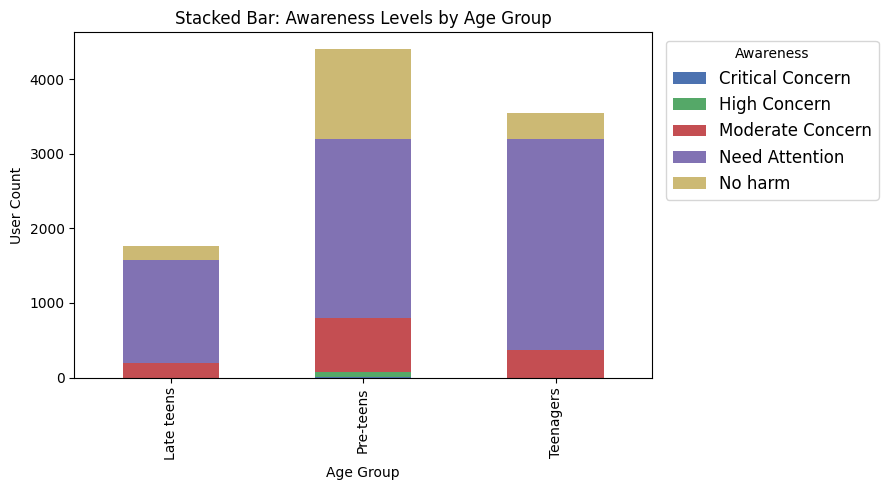

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

aware_age = pd.crosstab(df['Age_Group'], df['awareness'])
custom_colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD']
aware_age.plot(
    kind='bar',
    stacked=True,
    figsize=(9,5),
    color=custom_colors  # Pick any distinct hex codes
)
plt.title('Stacked Bar: Awareness Levels by Age Group')
plt.ylabel('User Count')
plt.xlabel('Age Group')
plt.legend(title='Awareness', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


#### SUMMARY

* Color-coded segments highlight five distinct awareness levels: Critical Concern, High Concern, Moderate Concern, Need Attention, and No Harm.

* Visual breakdown makes it easy to identify which age groups show elevated concern or minimal awareness.

* Comparative insight helps pinpoint demographic clusters that may require targeted outreach or education.

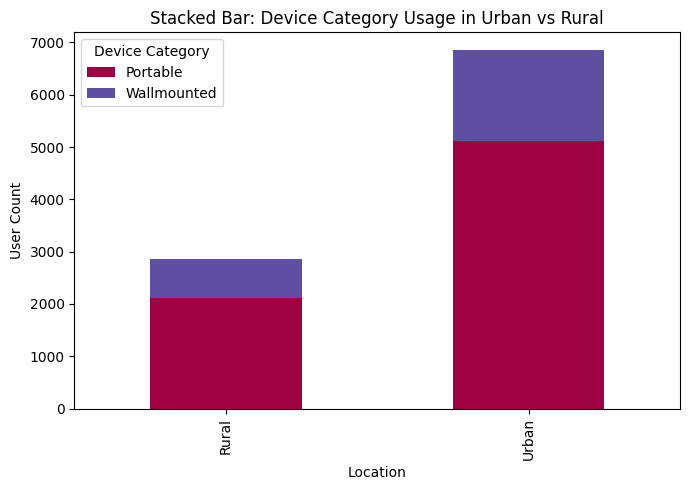

In [11]:
device_loc = pd.crosstab(df['Urban_or_Rural'], df['Device_Category'])
device_loc.plot(
    kind='bar', stacked=True, figsize=(7,5), colormap='Spectral'
)
plt.title('Stacked Bar: Device Category Usage in Urban vs Rural')
plt.xlabel('Location')
plt.ylabel('User Count')
plt.legend(title='Device Category')
plt.tight_layout()
plt.show()

* This stacked bar chart visualizes how device usage differs between urban and rural areas. Each bar represents the total number of users in each location, divided into two categories:

* Portable devices (e.g., smartphones, tablets)

* Wallmounted devices (e.g., fixed sensors, home panels)

* The chart highlights a clear trend: urban users show significantly higher adoption of portable devices, while rural areas maintain a more balanced mix. This contrast underscores how mobility and infrastructure shape technology access across regions.

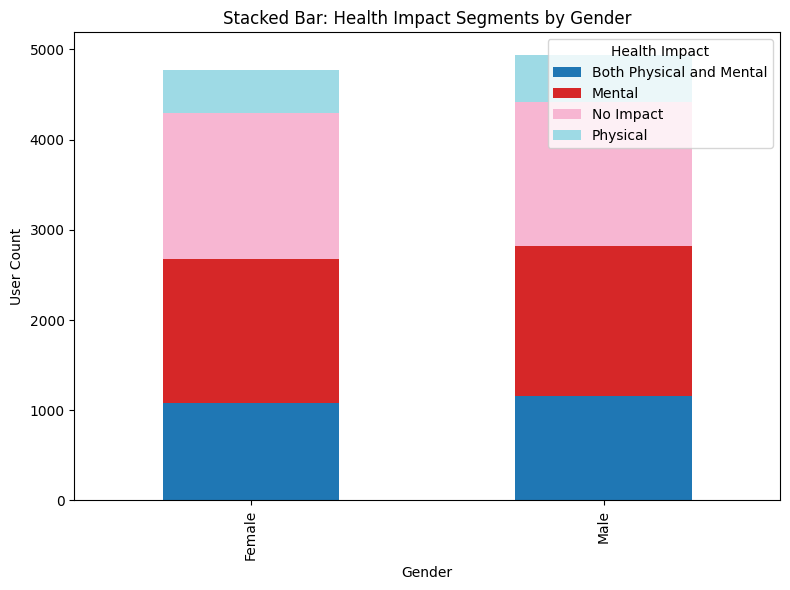

In [12]:
health_gender = pd.crosstab(df['Gender'], df['Health_Impact_Category'])
health_gender.plot(
    kind='bar', stacked=True, colormap='tab20', figsize=(8,6)
)
plt.title('Stacked Bar: Health Impact Segments by Gender')
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.legend(title='Health Impact')
plt.tight_layout()
plt.show()

This stacked bar chart displays how different health impact categories—such as physical, mental, and others—are distributed across male and female users:

Each bar corresponds to a gender group, divided into colored segments representing specific health impact types.

Segment sizes reveal how frequently each type of impact is reported within that gender.

The chart enables a side-by-side comparison of both total user counts and the relative share of each health concern, helping identify gender-specific patterns in health experiences.

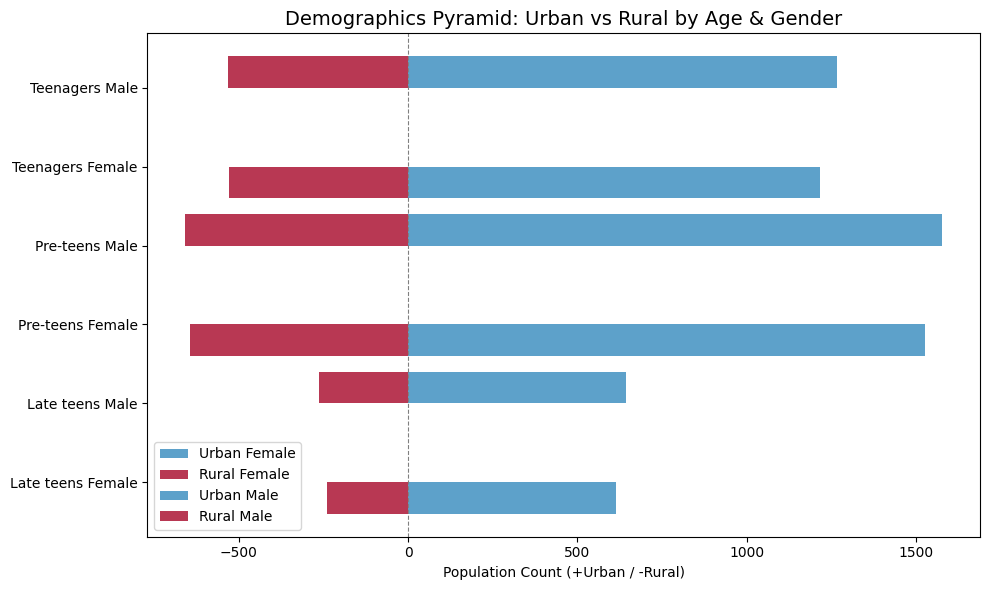

In [13]:
pyramid = df.groupby(['Age_Group', 'Gender', 'Urban_or_Rural']).size().unstack(fill_value=0).reset_index()

# Assign position
pyramid['Pos'] = np.arange(len(pyramid))

# Plot
plt.figure(figsize=(10,6))
bar_w = 0.4

for i, g in enumerate(pyramid['Gender'].unique()):
    sub = pyramid[pyramid['Gender'] == g]
    plt.barh(sub['Pos'] + (i-0.5)*bar_w, sub['Urban'],  bar_w, color='#348ABD', alpha=0.8, label=f'Urban {g}')
    plt.barh(sub['Pos'] + (i-0.5)*bar_w, -sub['Rural'], bar_w, color='#A60628', alpha=0.8, label=f'Rural {g}')

plt.axvline(0, color='gray', lw=0.8, ls='--')
plt.yticks(pyramid['Pos'], pyramid[['Age_Group', 'Gender']].astype(str).agg(' '.join, axis=1))
plt.title("Demographics Pyramid: Urban vs Rural by Age & Gender", fontsize=14)
plt.xlabel("Population Count (+Urban / -Rural)")
plt.legend()
plt.tight_layout()
plt.show()

* This horizontal bar chart reveals how age and gender groups are distributed across urban and rural populations:

* Red bars (left) show rural users; blue bars (right) show urban users.

* Each row corresponds to a specific demographic segment (e.g., "Teenagers Male", "Late Teens Female").

* The layout allows for quick visual comparison of gender balance and age group representation between locations.

* It’s a powerful tool for identifying which groups are overrepresented or underserved in urban versus rural settings.

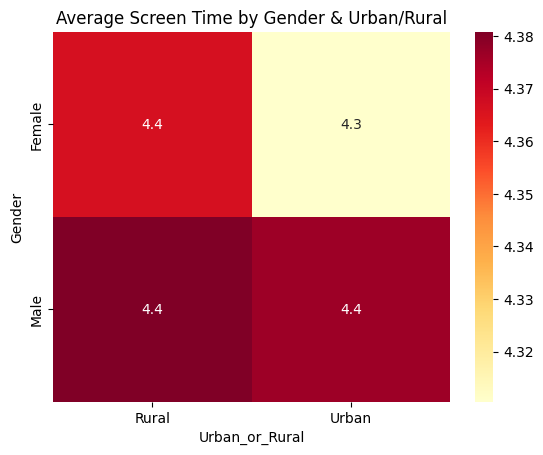

In [14]:
pivot = pd.pivot_table(
    df, index='Gender', columns='Urban_or_Rural', 
    values='Avg_Daily_Screen_Time_hr', aggfunc='mean'
)
sns.heatmap(pivot, annot=True, cmap='YlOrRd')
plt.title('Average Screen Time by Gender & Urban/Rural')
plt.show()

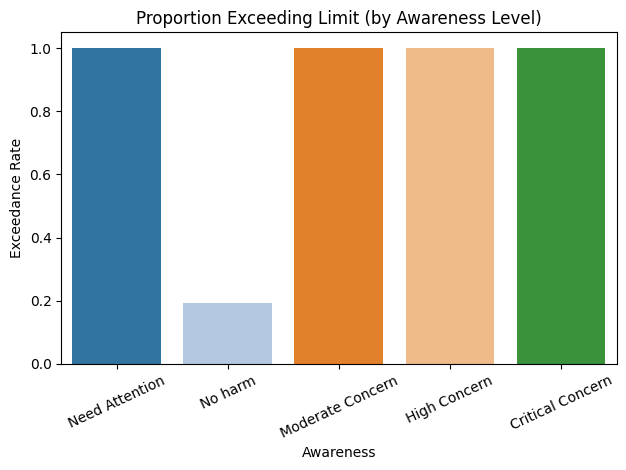

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.barplot(
    x='awareness', 
    y='Exceeded_Recommended_Limit',
    data=df, 
    estimator=np.mean, 
    errorbar=None, 
    palette='tab20',
    hue='awareness',        # assign awareness as hue for future compatibility
    legend=False
)
plt.title('Proportion Exceeding Limit (by Awareness Level)')
plt.ylabel('Exceedance Rate')
plt.xlabel('Awareness')
plt.xticks(rotation=25)     # Rotate x labels for clarity
plt.tight_layout()          # Prevent text overlap
plt.show()

* This barplot highlights how screen time habits vary across different awareness levels:

* Each bar represents the proportion of users within a specific awareness group who exceed the recommended screen time limit.

* Higher bars indicate greater overuse, signaling potential risk zones.



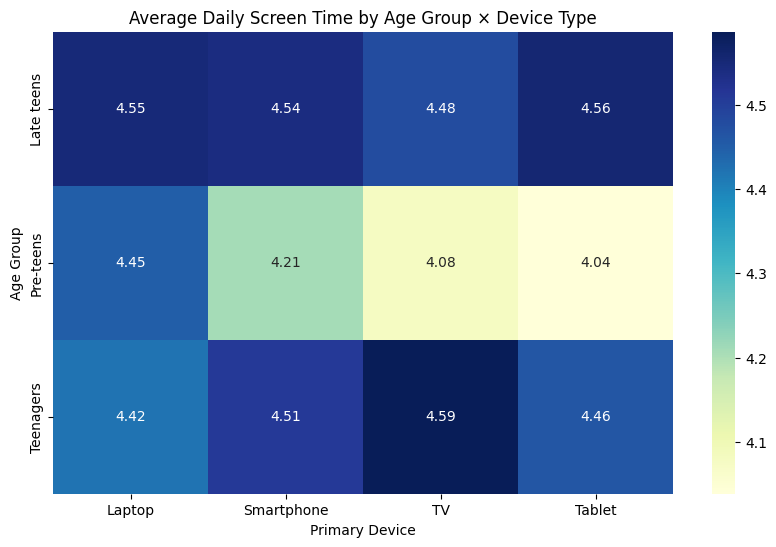

In [16]:

cohort = df.groupby(['Age_Group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().reset_index()

cohort_pivot = cohort.pivot(index='Age_Group', columns='Primary_Device', values='Avg_Daily_Screen_Time_hr')

# Heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(cohort_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Daily Screen Time by Age Group × Device Type")
plt.xlabel("Primary Device")
plt.ylabel("Age Group")
plt.show()

* This heatmap reveals how daily screen time varies across age groups and device types:

* Each cell represents the average number of hours spent on a specific device by a particular age group.

* Color shading indicates usage intensity—darker tones signal heavier screen time.

* The layout makes it easy to identify which combinations (like “Late teens on smartphones” or “Adults on laptops”) are the most screen-engaged, offering insights into digital habits across demographics.

## Summary
High-Risk Screen Time Groups: Teenagers and late teens using TVs, tablets, and laptops consistently show the highest daily screen time, marking them as key cohorts for intervention.

Age × Device Risk Patterns: Heatmaps reveal that screen time intensity is shaped by both age and device type—teenagers on tablets and TVs, and late teens on laptops, are standout heavy users.

Awareness Paradox: Surprisingly, users in high-awareness categories (“Need Attention”, “Critical Concern”) often exceed screen time limits more than others, suggesting that awareness alone doesn’t curb overuse.

Gendered Health Impact Trends: Mental health impacts and “no impact” reports dominate across genders, though proportions vary slightly between males and females.

Device Type & Health Correlation: Portable devices are far more prevalent than wall-mounted ones, and are more frequently associated with mental or combined health impacts across age groups.

Gender & Location Dynamics: Urban-rural differences in screen time are modest but present, with gender-based variations adding nuance to usage patterns.

Awareness Concentration by Age: Pre-teens and teenagers account for most “Need Attention” and “Moderate Concern” cases, spotlighting them as priority groups for awareness campaigns.

Urban-Rural Youth Divide: Demographic pyramids show urban youth—especially pre-teens—far outnumber rural peers, emphasizing disparities in access and exposure.

Device Access Disparity: Urban children have greater access to both portable and wall-mounted devices, with portable usage dominating the gap.

Outlier Behavior & Risk Tails: Violin plots expose extreme screen time cases, particularly among high-awareness smartphone users who log 12+ hours daily.

Multidimensional Risk Profiling: A mix of clustered, stacked, and split visualizations enables granular analysis of screen time behaviors, health impacts, and demographic patterns beyond simple averages.